<a href="https://colab.research.google.com/github/prabhatkumar13/JU-Classical/blob/main/JU_Classical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

2.4.1


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/JADHAV/SGLT2_amin.csv")
data.head()
data.shape

(224, 2327)

In [ ]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))


No of duplicates in DATA: 0


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 63 NaN/Null values in data


In [ ]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))

No of duplicates in DATA: 0


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 63 NaN/Null values in data


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 63 NaN/Null values in data


(224, 2327)

In [ ]:
#data = data.drop(['Arrival_Time'], axis = 1).copy()
data.shape

(224, 2327)

In [ ]:
data.head()

,Comp,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,-2.3462,5.504654,59.4243,66.794618,15,16,59,33,26,0,24,0,9,0,0,0,0,0,0,0,5792.468577,6103.190580,9206.958364,10740.46716,10206.047520,8596.966660,9045.061056,9591.022083,9249.209243,12920.09999,16616.69676,24914.09457,28367.57388,27261.48908,25250.21126,25585.59698,26831.08283,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,-1.8217,3.318591,54.7163,67.390618,18,20,59,33,26,0,24,2,7,0,0,0,0,0,0,0,5672.924673,6249.526869,9461.849926,10602.99496,9782.141394,8410.149844,8858.970864,9324.863379,8954.943419,12973.94678,16901.52524,25716.20502,28606.85340,27482.80524,25323.78832,25912.15252,27154.20112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,-1.5545,2.416470,63.8803,68.724204,15,16,61,33,28,0,24,2,7,0,0,0,0,0,0,0,5674.956801,6273.741045,9516.330310,10670.59850,9831.585810,8461.626388,8887.249296,9353.141811,8995.308779,13036.11427,17130.99847,26204.59599,29241.06473,27972.83545,25875.98602,26265.96073,27508.00933,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,-1.8896,3.570588,68.7287,71.817790,15,16,64,34,30,0,25,2,7,0,0,0,0,0,0,0,5821.253050,6442.219342,9710.038847,10977.33021,10190.724450,9002.678351,9432.741791,9930.674618,9728.209835,13521.79866,17783.98861,27118.14310,30389.33762,29446.12147,27514.44854,27968.71478,29462.90974,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,-1.0186,1.037546,69.1750,71.817790,15,16,64,34,30,0,25,2,7,0,0,0,0,0,0,0,5821.253050,6464.181330,9848.011724,11145.74803,10347.095660,9167.312452,9362.416802,10022.592290,9894.656004,13521.79866,17709.25253,27101.57024,30772.51396,29984.37499,28285.14552,28776.55693,29831.22730,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['Activity'].value_counts()

0    118
1    106
Name: Activity, dtype: int64

In [ ]:
data  = data.astype('float')

In [ ]:
gt= data['Activity'].value_counts().index
gt

Float64Index([0.0, 1.0], dtype='float64')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Activity'] = label.fit_transform(data['Activity'])
data.head()

,Comp,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1,0.0,-2.3462,5.504654,59.4243,66.794618,15.0,16.0,59.0,33.0,26.0,0.0,24.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5792.468577,6103.190580,9206.958364,10740.46716,10206.047520,8596.966660,9045.061056,9591.022083,9249.209243,12920.09999,16616.69676,24914.09457,28367.57388,27261.48908,25250.21126,25585.59698,26831.08283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0,0.0,-1.8217,3.318591,54.7163,67.390618,18.0,20.0,59.0,33.0,26.0,0.0,24.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5672.924673,6249.526869,9461.849926,10602.99496,9782.141394,8410.149844,8858.970864,9324.863379,8954.943419,12973.94678,16901.52524,25716.20502,28606.85340,27482.80524,25323.78832,25912.15252,27154.20112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0,0.0,-1.5545,2.416470,63.8803,68.724204,15.0,16.0,61.0,33.0,28.0,0.0,24.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5674.956801,6273.741045,9516.330310,10670.59850,9831.585810,8461.626388,8887.249296,9353.141811,8995.308779,13036.11427,17130.99847,26204.59599,29241.06473,27972.83545,25875.98602,26265.96073,27508.00933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0,0.0,-1.8896,3.570588,68.7287,71.817790,15.0,16.0,64.0,34.0,30.0,0.0,25.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5821.253050,6442.219342,9710.038847,10977.33021,10190.724450,9002.678351,9432.741791,9930.674618,9728.209835,13521.79866,17783.98861,27118.14310,30389.33762,29446.12147,27514.44854,27968.71478,29462.90974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0,0.0,-1.0186,1.037546,69.1750,71.817790,15.0,16.0,64.0,34.0,30.0,0.0,25.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5821.253050,6464.181330,9848.011724,11145.74803,10347.095660,9167.312452,9362.416802,10022.592290,9894.656004,13521.79866,17709.25253,27101.57024,30772.51396,29984.37499,28285.14552,28776.55693,29831.22730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = data.fillna(data.mean())

In [ ]:
df = df.drop(['Comp'], axis = 1).copy()
df.head()

,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0.0,-2.3462,5.504654,59.4243,66.794618,15.0,16.0,59.0,33.0,26.0,0.0,24.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5792.468577,6103.190580,9206.958364,10740.46716,10206.047520,8596.966660,9045.061056,9591.022083,9249.209243,12920.09999,16616.69676,24914.09457,28367.57388,27261.48908,25250.21126,25585.59698,26831.08283,26349.19308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,-1.8217,3.318591,54.7163,67.390618,18.0,20.0,59.0,33.0,26.0,0.0,24.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5672.924673,6249.526869,9461.849926,10602.99496,9782.141394,8410.149844,8858.970864,9324.863379,8954.943419,12973.94678,16901.52524,25716.20502,28606.85340,27482.80524,25323.78832,25912.15252,27154.20112,26505.05117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,-1.5545,2.416470,63.8803,68.724204,15.0,16.0,61.0,33.0,28.0,0.0,24.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5674.956801,6273.741045,9516.330310,10670.59850,9831.585810,8461.626388,8887.249296,9353.141811,8995.308779,13036.11427,17130.99847,26204.59599,29241.06473,27972.83545,25875.98602,26265.96073,27508.00933,26883.65807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,-1.8896,3.570588,68.7287,71.817790,15.0,16.0,64.0,34.0,30.0,0.0,25.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5821.253050,6442.219342,9710.038847,10977.33021,10190.724450,9002.678351,9432.741791,9930.674618,9728.209835,13521.79866,17783.98861,27118.14310,30389.33762,29446.12147,27514.44854,27968.71478,29462.90974,29402.63647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,-1.0186,1.037546,69.1750,71.817790,15.0,16.0,64.0,34.0,30.0,0.0,25.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5821.253050,6464.181330,9848.011724,11145.74803,10347.095660,9167.312452,9362.416802,10022.592290,9894.656004,13521.79866,17709.25253,27101.57024,30772.51396,29984.37499,28285.14552,28776.55693,29831.22730,29993.45911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#library addition
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:
#determine the number of classes(labels)
label_encoder = LabelEncoder().fit(df.Activity)
labels = label_encoder.transform(df.Activity)
classes = list(label_encoder.classes_)

In [ ]:
#split train data into validation and train
from sklearn.model_selection import train_test_split
wrist_X_train, wrist_X_test, wrist_Y_train, wrist_Y_test = train_test_split(df, labels, test_size=0.2)

In [ ]:
wrist_X_train.shape, wrist_X_test.shape

((179, 2326), (45, 2326))

In [ ]:
wrist_X_train.to_csv('TrainData.csv')

In [ ]:
wrist_X_test.to_csv('TestData.csv')

In [ ]:
wrist_X_test.head()

,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
29,0,0.0,-1.5808,2.498929,50.6724,69.481825,20.0,22.0,58.0,33.0,25.0,0.0,25.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6391.852280,6571.305195,9628.023123,10515.74925,10124.872640,9045.475396,8756.508534,8558.393393,7960.253412,13503.45223,17367.00785,26187.06026,28724.62736,28325.70247,26719.43736,25788.60881,25615.50460,24438.89094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,1,0.0,-0.6448,0.415767,62.3686,64.673411,12.0,12.0,56.0,29.0,27.0,0.0,23.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5882.051016,5528.347901,8712.237306,10938.88650,10183.599470,9546.874957,8714.513063,7523.060490,6981.269055,12166.07468,15833.29216,24860.21998,30060.09770,30258.84056,28230.93600,25019.62908,21508.80344,19216.10806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0,0.0,-0.8032,0.645130,47.6664,60.170446,15.0,16.0,53.0,31.0,22.0,0.0,22.0,1.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,5755.018096,5798.513842,9483.043592,10296.05841,9358.953189,8002.896128,7736.383385,7041.097123,6834.683792,11857.61429,15311.57408,23538.16295,27190.28907,26356.92941,23598.18009,22510.15720,21117.44605,18938.00190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0,0.0,-1.0220,1.044484,46.6938,62.446239,17.0,18.0,53.0,30.0,23.0,0.0,22.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6126.114737,5748.037466,8641.410113,10166.68478,9115.429779,8669.505174,8617.609567,7479.803930,7561.207062,12104.85115,15310.14031,23106.23203,26386.29469,25615.92126,24436.88147,22644.04515,19933.15759,18575.26963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0,0.0,-2.1714,4.714978,42.8789,70.108618,21.0,23.0,60.0,34.0,26.0,0.0,26.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5705.484914,6294.007238,9326.437406,10762.71380,9886.923984,8877.062776,8840.235697,8536.283411,7865.427318,13604.58981,17541.80663,26378.13072,29922.26868,28848.02440,27250.37184,26814.39676,26378.40808,24759.11963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
wrist_X_test = wrist_X_test.drop(['Activity'], axis = 1).copy()
wrist_X_test.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
29,0.0,-1.5808,2.498929,50.6724,69.481825,20.0,22.0,58.0,33.0,25.0,0.0,25.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6391.852280,6571.305195,9628.023123,10515.74925,10124.872640,9045.475396,8756.508534,8558.393393,7960.253412,13503.45223,17367.00785,26187.06026,28724.62736,28325.70247,26719.43736,25788.60881,25615.50460,24438.89094,455.530281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,-0.6448,0.415767,62.3686,64.673411,12.0,12.0,56.0,29.0,27.0,0.0,23.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5882.051016,5528.347901,8712.237306,10938.88650,10183.599470,9546.874957,8714.513063,7523.060490,6981.269055,12166.07468,15833.29216,24860.21998,30060.09770,30258.84056,28230.93600,25019.62908,21508.80344,19216.10806,433.664601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,-0.8032,0.645130,47.6664,60.170446,15.0,16.0,53.0,31.0,22.0,0.0,22.0,1.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,5755.018096,5798.513842,9483.043592,10296.05841,9358.953189,8002.896128,7736.383385,7041.097123,6834.683792,11857.61429,15311.57408,23538.16295,27190.28907,26356.92941,23598.18009,22510.15720,21117.44605,18938.00190,438.657776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,-1.0220,1.044484,46.6938,62.446239,17.0,18.0,53.0,30.0,23.0,0.0,22.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6126.114737,5748.037466,8641.410113,10166.68478,9115.429779,8669.505174,8617.609567,7479.803930,7561.207062,12104.85115,15310.14031,23106.23203,26386.29469,25615.92126,24436.88147,22644.04515,19933.15759,18575.26963,419.653501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,-2.1714,4.714978,42.8789,70.108618,21.0,23.0,60.0,34.0,26.0,0.0,26.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5705.484914,6294.007238,9326.437406,10762.71380,9886.923984,8877.062776,8840.235697,8536.283411,7865.427318,13604.58981,17541.80663,26378.13072,29922.26868,28848.02440,27250.37184,26814.39676,26378.40808,24759.11963,471.247048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
wrist_X_train = wrist_X_train.drop(['Activity'], axis = 1).copy()
wrist_X_train.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
76,0.0,-1.5606,2.435472,54.9376,56.353032,11.0,11.0,49.0,25.0,24.0,0.0,19.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5073.087440,4970.797281,7563.331062,8262.457294,7516.330298,6757.250671,6162.587912,5385.322807,4926.004110,10471.56212,13491.46050,20317.19019,22703.98743,22153.10685,20747.26312,18964.30166,16616.88961,14246.14896,380.015369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0377,0.001421,65.5661,57.672653,11.0,11.0,47.0,26.0,21.0,0.0,18.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,7210.321227,5841.883045,9353.426135,10222.034410,9105.027090,9223.271745,8773.485615,6759.806782,7187.641838,11055.54218,13767.68826,20751.70403,23356.11388,22621.76279,20981.49457,18760.09133,15359.22563,13562.66369,373.138935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,0.0,-0.6819,0.464988,51.6294,60.306239,15.0,16.0,51.0,28.0,23.0,0.0,21.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5556.795667,5623.712393,8379.062998,9662.502525,8553.520720,7900.166860,8229.345867,7666.007882,6256.460101,11530.82635,14846.60412,22634.51111,25858.68029,24802.30103,22902.74669,22114.43084,20283.28086,17383.83721,398.579573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,-2.2232,4.942618,50.1947,62.103825,15.0,16.0,55.0,30.0,25.0,0.0,22.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5187.184318,5608.431369,8314.988911,9719.962875,8819.471301,7779.408397,8037.893084,7954.345923,7211.252937,11852.51506,15272.92374,22853.89072,26018.08928,25263.02188,23653.44748,23635.99674,23732.51752,21860.04921,437.516600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.1039,0.010795,79.7888,74.756169,12.0,12.0,66.0,33.0,33.0,0.0,26.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6576.907764,6129.582528,8915.446790,11036.756250,10550.382490,10708.019990,11511.344320,11081.386840,10743.206360,13839.51863,17550.68777,25900.08792,30953.22677,31558.12062,31473.45423,31626.84029,31156.37649,30009.93671,509.948649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
wrist_Y_train.shape, wrist_Y_test.shape

((179,), (45,))

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
classifiers = [
    linear_model.LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    #QuadraticDiscriminantAnalysis()
    ]

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import plot_roc_curve

In [ ]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression
****Results****
Accuracy: 87.1508%
Precision: 0.871598
Recall: 0.871877
F1 score: 0.871492
[[79 13]
 [10 77]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        92
           1       0.86      0.89      0.87        87

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179

complete !!!
KNeighborsClassifier
****Results****
Accuracy: 88.2682%
Precision: 0.882772
Recall: 0.883058
F1 score: 0.882667
[[80 12]
 [ 9 78]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        92
           1       0.87      0.90      0.88        87

    accuracy                           0.88       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179

complete !!!
SVC
****Results****
Accuracy: 51.3966%
Precision: 0.256983
R

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 100.0000%
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
[[92  0]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        87

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

complete !!!
RandomForestClassifier
****Results****
Accuracy: 100.0000%
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
[[92  0]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        87

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

complete !!!
AdaBoostClassifier
****Results****
Accuracy: 100.0000%
Precision: 1.000000
Recall: 1.000000

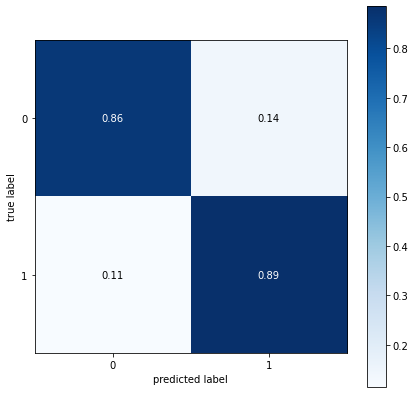

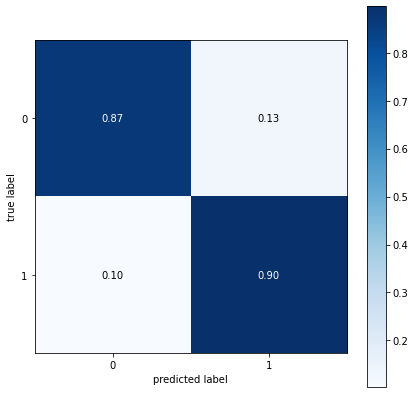

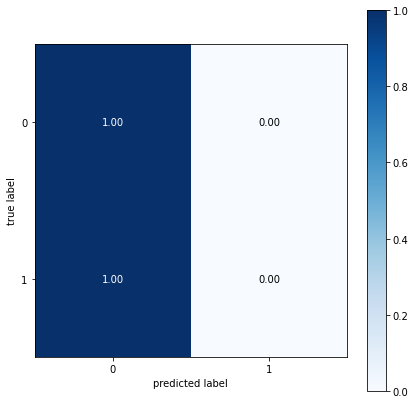

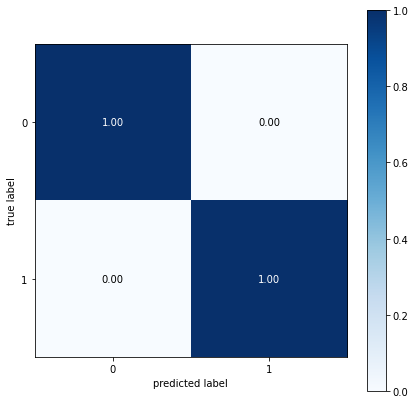

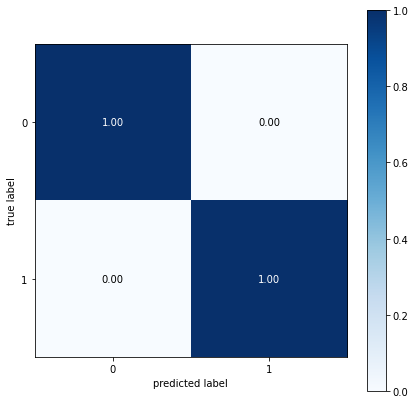

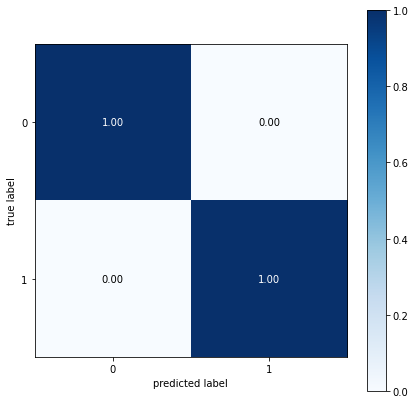

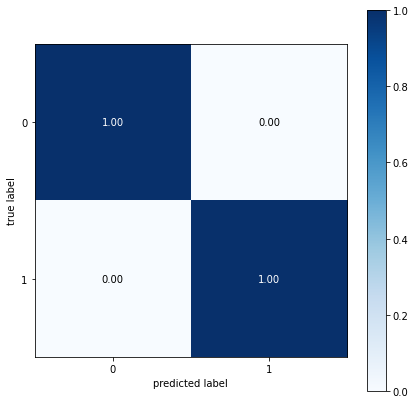

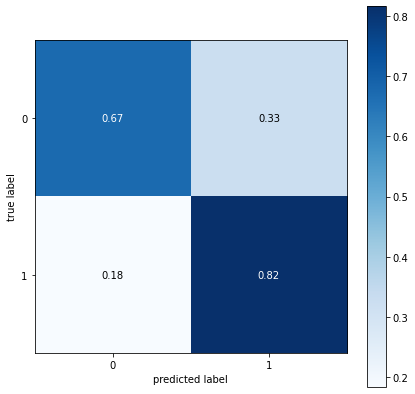

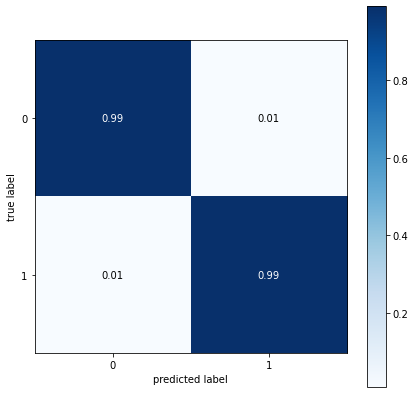

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(wrist_X_train, wrist_Y_train)
    name = clf.__class__.__name__    
    print("="*30)
    print(name)
       
    print('****Results****')
    wrist_lg_model = clf.fit(wrist_X_train, wrist_Y_train)
    wrist_lg_pred = clf.predict(wrist_X_train)
    train_predictions = clf.predict_proba(wrist_X_train)
    ll = log_loss(wrist_Y_train, train_predictions)

    acc = accuracy_score(wrist_Y_train, wrist_lg_pred)
    print("Accuracy: {:.4%}".format(acc))
    precision = precision_score(wrist_Y_train, wrist_lg_pred, average='macro')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(wrist_Y_train, wrist_lg_pred, average='macro')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(wrist_Y_train, wrist_lg_pred, average='macro')
    print('F1 score: %f' % f1)
    print(confusion_matrix(wrist_Y_train, wrist_lg_pred))
    print(classification_report(wrist_Y_train, wrist_lg_pred))

    plot_confusion_matrix(conf_mat=confusion_matrix(wrist_Y_train, wrist_lg_pred),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)



    print("complete !!!")

print("="*30)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression
****Results****
Accuracy: 75.5556%
Precision: 0.761905
Recall: 0.767206
F1 score: 0.755072
[[18  8]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.67      0.84      0.74        19

    accuracy                           0.76        45
   macro avg       0.76      0.77      0.76        45
weighted avg       0.78      0.76      0.76        45



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MAE: -0.241 (0.087)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MSE: -0.241 (0.087)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


R^2: 0.035 (0.350)
Cohens kappa: 0.516129
ROC AUC: 0.767206
[[18  8]
 [ 3 16]]


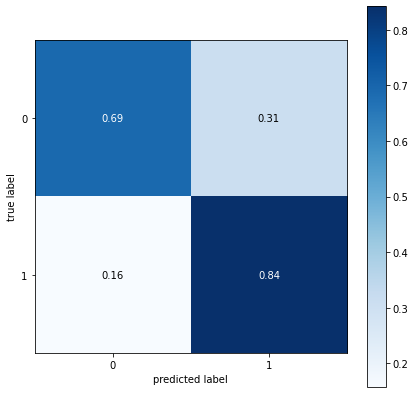

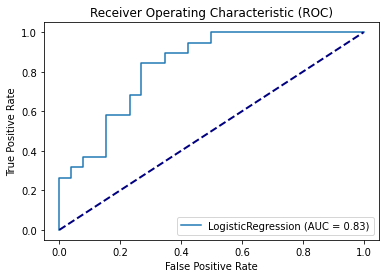

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

fit_time          0.120247
score_time        0.009876
test_accuracy     0.726144
test_precision    0.712958
test_recall       0.780626
test_f1_score     0.724661
dtype: float64
complete !!!
KNeighborsClassifier
****Results****
Accuracy: 75.5556%
Precision: 0.774291
Recall: 0.774291
F1 score: 0.755556
[[17  9]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.65      0.89      0.76        19

    accuracy                           0.76        45
   macro avg       0.77      0.77      0.76        45
weighted avg       0.79      0.76      0.76        45

MAE: -0.262 (0.024)
MSE: -0.262 (0.024)
R^2: -0.053 (0.096)
Cohens kappa: 0.522662
ROC AUC: 0.774291
[[17  9]
 [ 2 17]]


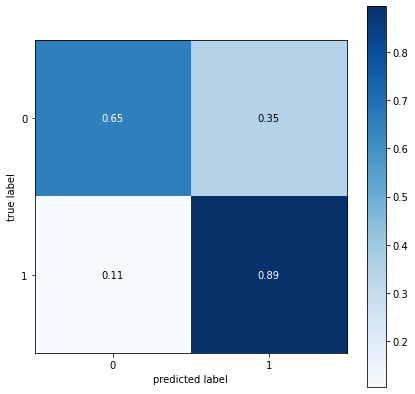

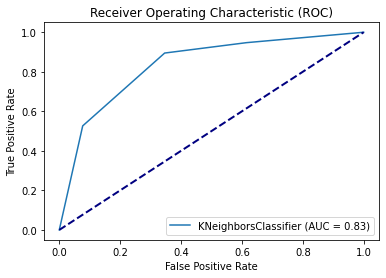

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


fit_time          0.017486
score_time        0.017716
test_accuracy     0.732026
test_precision    0.707247
test_recall       0.771896
test_f1_score     0.728344
dtype: float64
complete !!!
SVC
****Results****
Accuracy: 57.7778%
Precision: 0.288889
Recall: 0.500000
F1 score: 0.366197
[[26  0]
 [19  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.00      0.00      0.00        19

    accuracy                           0.58        45
   macro avg       0.29      0.50      0.37        45
weighted avg       0.33      0.58      0.42        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAE: -0.486 (0.023)
MSE: -0.486 (0.023)
R^2: -0.949 (0.081)
Cohens kappa: 0.000000
ROC AUC: 0.500000
[[26  0]
 [19  0]]


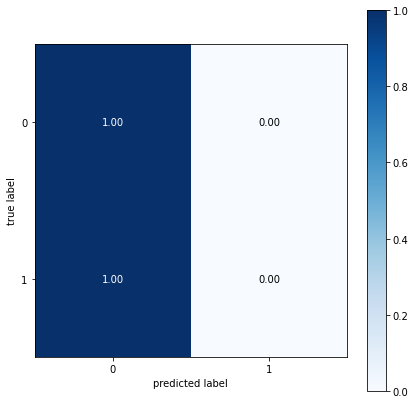

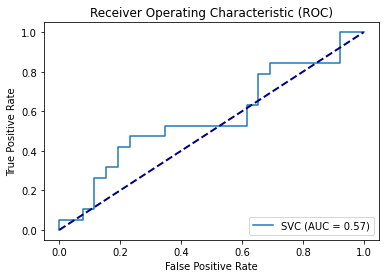

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set

fit_time          0.351486
score_time        0.014617
test_accuracy     0.436275
test_precision    0.061111
test_recall       0.200000
test_f1_score     0.093478
dtype: float64
complete !!!
DecisionTreeClassifier
****Results****
Accuracy: 77.7778%
Precision: 0.773810
Recall: 0.779352
F1 score: 0.775000
[[20  6]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.71      0.79      0.75        19

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

MAE: -0.251 (0.083)
MSE: -0.262 (0.070)
R^2: -0.097 (0.388)
Cohens kappa: 0.550898
ROC AUC: 0.779352
[[20  6]
 [ 4 15]]


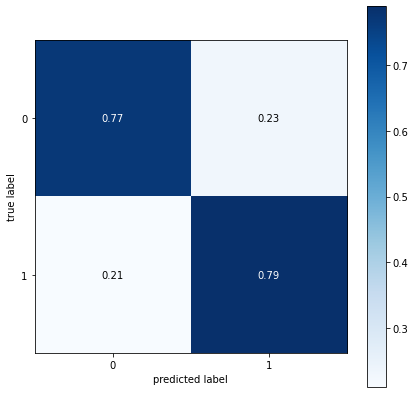

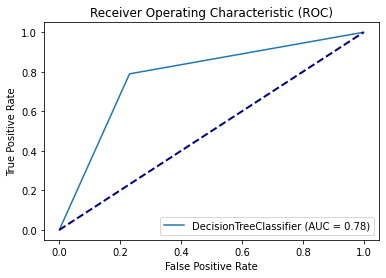

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


fit_time          0.063683
score_time        0.006246
test_accuracy     0.759804
test_precision    0.758810
test_recall       0.749026
test_f1_score     0.740373
dtype: float64
complete !!!
RandomForestClassifier
****Results****
Accuracy: 82.2222%
Precision: 0.818452
Recall: 0.824899
F1 score: 0.820000
[[21  5]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.76      0.84      0.80        19

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45

MAE: -0.174 (0.048)
MSE: -0.168 (0.059)
R^2: 0.214 (0.216)
Cohens kappa: 0.640719
ROC AUC: 0.824899
[[21  5]
 [ 3 16]]


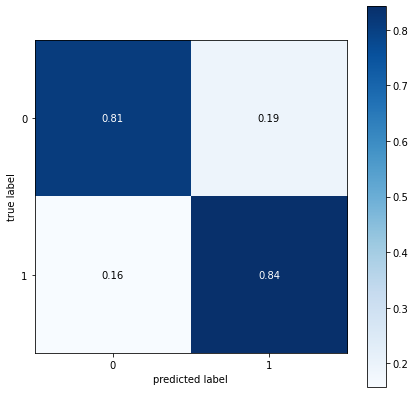

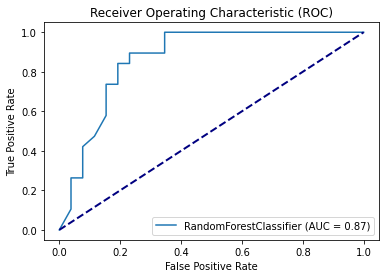

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


fit_time          0.245147
score_time        0.018327
test_accuracy     0.815686
test_precision    0.813056
test_recall       0.802955
test_f1_score     0.799855
dtype: float64
complete !!!
AdaBoostClassifier
****Results****
Accuracy: 77.7778%
Precision: 0.805556
Recall: 0.800607
F1 score: 0.777668
[[17  9]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77        26
           1       0.67      0.95      0.78        19

    accuracy                           0.78        45
   macro avg       0.81      0.80      0.78        45
weighted avg       0.83      0.78      0.78        45

MAE: -0.251 (0.056)
MSE: -0.251 (0.056)
R^2: -0.008 (0.225)
Cohens kappa: 0.568966
ROC AUC: 0.800607
[[17  9]
 [ 1 18]]


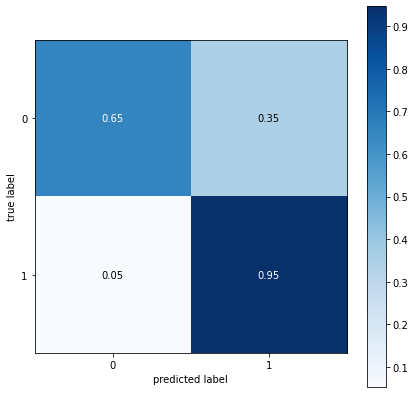

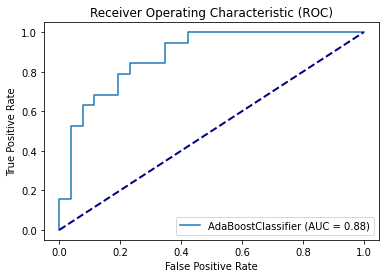

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


fit_time          0.768943
score_time        0.017942
test_accuracy     0.754248
test_precision    0.729188
test_recall       0.780534
test_f1_score     0.746818
dtype: float64
complete !!!
GradientBoostingClassifier
****Results****
Accuracy: 75.5556%
Precision: 0.792017
Recall: 0.781377
F1 score: 0.755072
[[16 10]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.64      0.95      0.77        19

    accuracy                           0.76        45
   macro avg       0.79      0.78      0.76        45
weighted avg       0.82      0.76      0.75        45

MAE: -0.185 (0.080)
MSE: -0.190 (0.080)
R^2: 0.237 (0.320)
Cohens kappa: 0.529020
ROC AUC: 0.781377
[[16 10]
 [ 1 18]]


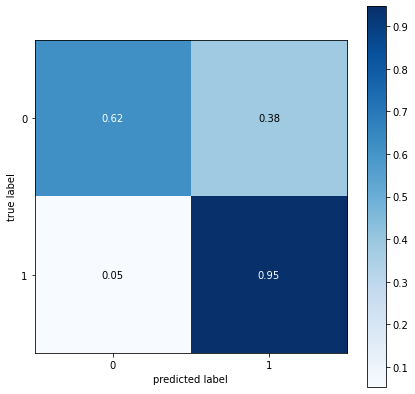

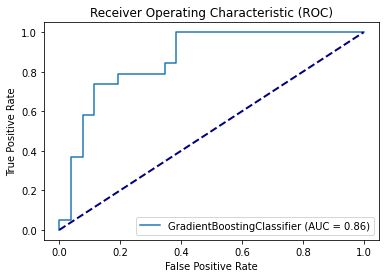

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


fit_time          3.221258
score_time        0.006326
test_accuracy     0.809804
test_precision    0.824881
test_recall       0.796010
test_f1_score     0.796686
dtype: float64
complete !!!
GaussianNB
****Results****
Accuracy: 73.3333%
Precision: 0.735178
Recall: 0.740891
F1 score: 0.732143
[[18  8]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        26
           1       0.65      0.79      0.71        19

    accuracy                           0.73        45
   macro avg       0.74      0.74      0.73        45
weighted avg       0.75      0.73      0.73        45

MAE: -0.296 (0.050)
MSE: -0.296 (0.050)
R^2: -0.188 (0.200)
Cohens kappa: 0.468504
ROC AUC: 0.740891
[[18  8]
 [ 4 15]]


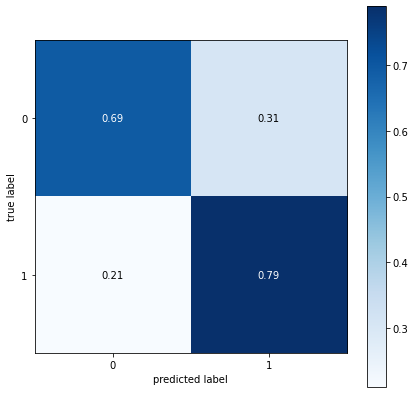

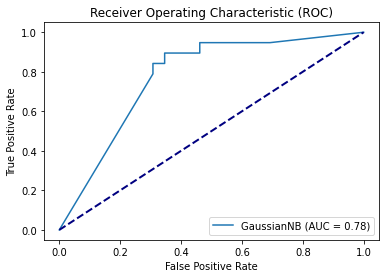

10-fold validation test
fit_time          0.009876
score_time        0.006322
test_accuracy     0.681699
test_precision    0.647647
test_recall       0.760388
test_f1_score     0.683201
dtype: float64
complete !!!


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LinearDiscriminantAnalysis
****Results****
Accuracy: 71.1111%
Precision: 0.709486
Recall: 0.714575
F1 score: 0.708810
[[18  8]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.64      0.74      0.68        19

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.72      0.71      0.71        45

MAE: -0.257 (0.063)
MSE: -0.257 (0.063)
R^2: -0.032 (0.253)
Cohens kappa: 0.420218
ROC AUC: 0.714575
[[18  8]
 [ 5 14]]


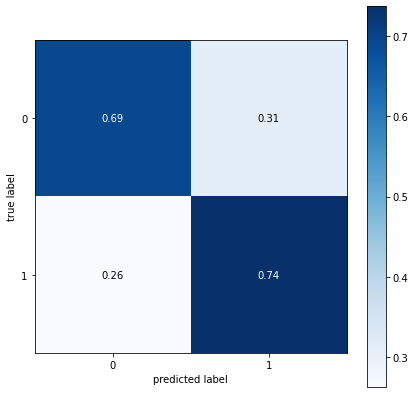

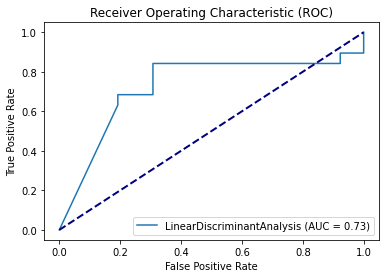

10-fold validation test


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


fit_time          0.183216
score_time        0.012056
test_accuracy     0.759477
test_precision    0.756934
test_recall       0.744139
test_f1_score     0.729538
dtype: float64
complete !!!


In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(wrist_X_train, wrist_Y_train)
    name = clf.__class__.__name__    
    print("="*30)
    print(name)
       
    print('****Results****')
    wrist_lg_model = clf.fit(wrist_X_train, wrist_Y_train)
    wrist_lg_pred = clf.predict(wrist_X_test)
    train_predictions = clf.predict_proba(wrist_X_test)
    ll = log_loss(wrist_Y_test, train_predictions)

    acc = accuracy_score(wrist_Y_test, wrist_lg_pred)
    print("Accuracy: {:.4%}".format(acc))
    precision = precision_score(wrist_Y_test, wrist_lg_pred, average='macro')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(wrist_Y_test, wrist_lg_pred, average='macro')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(wrist_Y_test, wrist_lg_pred, average='macro')
    print('F1 score: %f' % f1)
    print(confusion_matrix(wrist_Y_test, wrist_lg_pred))
    print(classification_report(wrist_Y_test, wrist_lg_pred))

    plot_confusion_matrix(conf_mat=confusion_matrix(wrist_Y_test, wrist_lg_pred),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)


    scoring = 'neg_mean_absolute_error'
    results = model_selection.cross_val_score(clf, wrist_X_train, wrist_Y_train, cv=10, scoring=scoring)
    print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))
    scoring = 'neg_mean_squared_error'
    results = model_selection.cross_val_score(clf, wrist_X_train, wrist_Y_train, cv=10, scoring=scoring)
    print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))
    scoring = 'r2'
    results = model_selection.cross_val_score(clf, wrist_X_train, wrist_Y_train, cv=10, scoring=scoring)
    print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

     # kappa
    kappa = cohen_kappa_score(wrist_Y_test,wrist_lg_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(wrist_Y_test,wrist_lg_pred)
    print('ROC AUC: %f' % auc)
    # confusion matrix
    matrix = confusion_matrix(wrist_Y_test,wrist_lg_pred)
    print(matrix)
    
    svc_disp = plot_roc_curve(clf, wrist_X_test, wrist_Y_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.show()

    title = clf
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.

    print("10-fold validation test")
    # 10-Fold Cross validation


    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

    kfold = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_validate(estimator=clf,
                                          X=wrist_X_train,
                                          y=wrist_Y_train,
                                          cv=kfold,
                                          scoring=scoring)
    df = pd.DataFrame(results)
    print(df.mean(axis = 0) )
    plt.show()

    print("complete !!!")

print("="*30)



In [ ]:
testdata= pd.read_csv("/content/FDA_1017.csv")
testdata.head()

,Comp,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,A0001,NaN,0,-1.9235,3.699852,50.8675,35.107895,0,0,31,16,15,0,10,2,3,1,0,0,0,0,0,0,3646.021871,3359.332819,5024.765848,4419.079839,3363.531980,3015.627342,2288.799617,2650.078380,1909.174465,6434.003098,8251.34911,12502.07588,12536.34888,10454.56446,8494.832283,7015.580069,5965.236514,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A0002,NaN,0,-1.4467,2.092941,50.1658,65.000825,16,17,55,30,25,0,22,4,2,0,0,1,0,1,0,2,11241.521000,6374.170728,9576.391440,10547.786400,9973.697581,8416.845567,8645.325250,9196.952359,8903.916273,12380.956160,15355.82410,22848.83971,26115.19391,23862.92293,21859.402840,22692.835210,22825.408850,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A0003,NaN,0,0.3232,0.104458,35.8446,49.642653,15,16,42,21,21,0,19,2,0,0,0,0,0,0,0,0,3154.747741,3716.167367,5296.060881,5502.316457,4513.008781,3875.517826,3664.581561,3412.089003,2917.596036,9186.208113,11535.31856,16953.95853,19490.04806,18412.86861,15571.085420,14207.507110,13294.310940,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A0004,NaN,0,0.5549,0.307914,27.8219,43.111930,19,21,32,22,10,0,14,4,2,2,0,0,0,0,0,0,5382.265732,5080.295165,7710.960176,6626.265745,6868.127923,5182.739883,3791.307100,4756.994124,4054.261258,8839.666789,10746.01021,15283.86542,13669.98101,12993.26500,11041.317950,9276.881645,8580.282663,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A0005,NaN,0,-0.8860,0.784996,100.0796,103.407271,18,18,92,45,47,0,36,5,4,0,0,0,0,0,0,0,7246.115613,8129.325753,11903.778790,12768.318530,12951.240920,14072.475390,14148.922270,14203.654820,14951.763100,18789.678430,24310.73445,36640.73330,42943.71506,43060.97960,43972.072320,46440.156580,49129.533900,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testdata.shape

(1017, 2327)

In [ ]:
test = testdata.drop(['Comp','Activity'], axis = 1).copy()
test.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,-1.9235,3.699852,50.8675,35.107895,0,0,31,16,15,0,10,2,3,1,0,0,0,0,0,0,3646.021871,3359.332819,5024.765848,4419.079839,3363.531980,3015.627342,2288.799617,2650.078380,1909.174465,6434.003098,8251.34911,12502.07588,12536.34888,10454.56446,8494.832283,7015.580069,5965.236514,4333.071290,245.384389,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-1.4467,2.092941,50.1658,65.000825,16,17,55,30,25,0,22,4,2,0,0,1,0,1,0,2,11241.521000,6374.170728,9576.391440,10547.786400,9973.697581,8416.845567,8645.325250,9196.952359,8903.916273,12380.956160,15355.82410,22848.83971,26115.19391,23862.92293,21859.402840,22692.835210,22825.408850,20709.947590,427.724889,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.3232,0.104458,35.8446,49.642653,15,16,42,21,21,0,19,2,0,0,0,0,0,0,0,0,3154.747741,3716.167367,5296.060881,5502.316457,4513.008781,3875.517826,3664.581561,3412.089003,2917.596036,9186.208113,11535.31856,16953.95853,19490.04806,18412.86861,15571.085420,14207.507110,13294.310940,11504.025630,304.760820,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.5549,0.307914,27.8219,43.111930,19,21,32,22,10,0,14,4,2,2,0,0,0,0,0,0,5382.265732,5080.295165,7710.960176,6626.265745,6868.127923,5182.739883,3791.307100,4756.994124,4054.261258,8839.666789,10746.01021,15283.86542,13669.98101,12993.26500,11041.317950,9276.881645,8580.282663,8483.950285,257.749538,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-0.8860,0.784996,100.0796,103.407271,18,18,92,45,47,0,36,5,4,0,0,0,0,0,0,0,7246.115613,8129.325753,11903.778790,12768.318530,12951.240920,14072.475390,14148.922270,14203.654820,14951.763100,18789.678430,24310.73445,36640.73330,42943.71506,43060.97960,43972.072320,46440.156580,49129.533900,50335.280300,691.641428,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(test.isnull().values.sum()))

We have 2307 NaN/Null values in data


In [ ]:
test  = test.astype('float')
test = test.dropna(how='any',axis=0) 

In [ ]:
from random import randint
randomlist = []

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(wrist_X_train, wrist_Y_train)
    name = clf.__class__.__name__    
    print("="*30)
    print(name)
       
    print('****Results****')
    wrist_lg_model = clf.fit(wrist_X_train, wrist_Y_train)
    wrist_lg_pred = clf.predict(test)
    train_predictions = clf.predict_proba(test)
    print(wrist_lg_pred)
    print(len(wrist_lg_pred))

      # convert numpy array to dataframe
    
    org = pd.DataFrame(wrist_lg_pred, columns =['Activity Label'])
    print("\nPandas DataFrame: ")
    print(org)
    org ["Compound Name"] = testdata["Comp"].head(1005).values
    
    dff = pd.concat([org, test.iloc[:,1:]], axis = 1)

    string = str(clf)
    st = string[0:15]
    print(dff)
    # saving the dataframe
    dff.to_csv(  st + '.csv')



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression
****Results****
[0 1 0 ... 0 1 1]
1005

Pandas DataFrame: 
      Activity Label
0                  0
1                  1
2                  0
3                  0
4                  1
...              ...
1000               0
1001               0
1002               0
1003               1
1004               1

[1005 rows x 1 columns]
      Activity Label Compound Name  ...  PubchemFP879  PubchemFP880
0                0.0         A0001  ...           0.0           0.0
1                1.0         A0002  ...           0.0           0.0
2                0.0         A0003  ...           0.0           0.0
3                0.0         A0004  ...           0.0           0.0
4                1.0         A0005  ...           0.0           0.0
...              ...           ...  ...           ...           ...
1012             NaN           NaN  ...           0.0           0.0
1013             NaN           NaN  ...           0.0           0.0
1014             NaN           Na